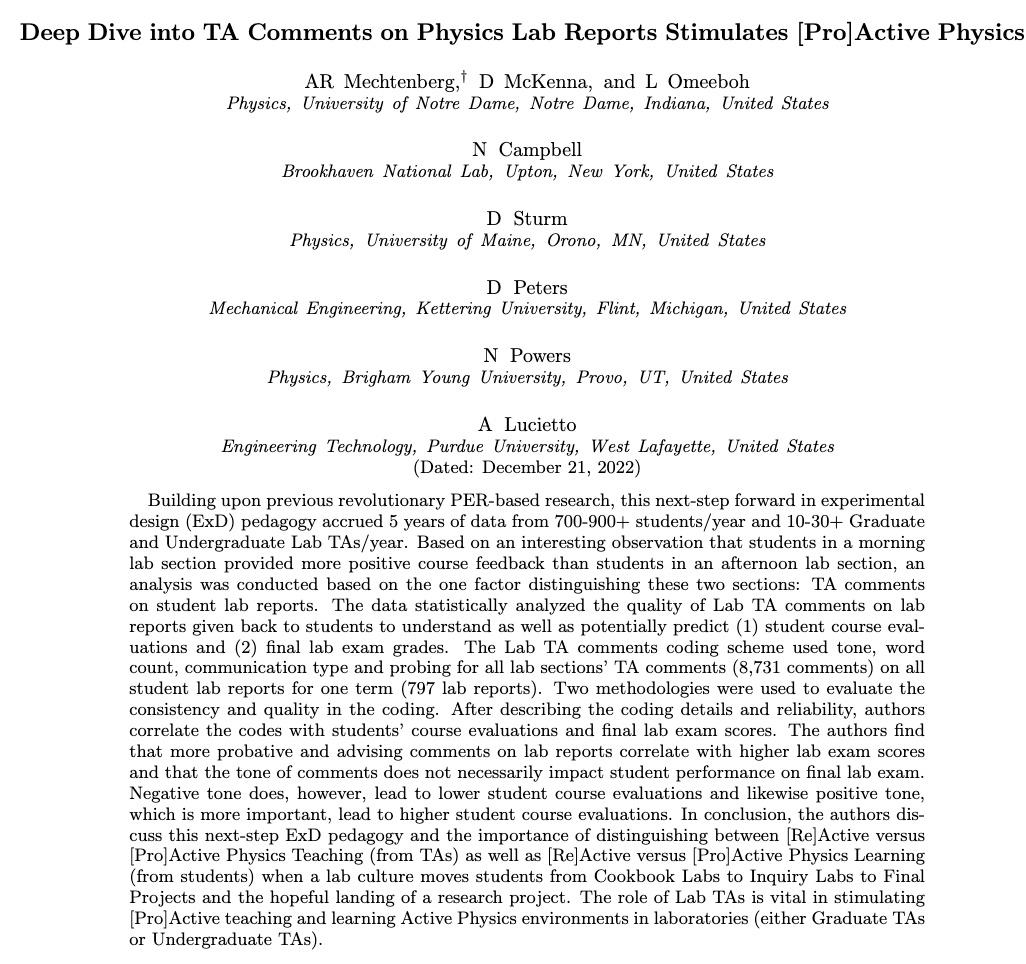

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 10), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 4.39 MiB | 7.51 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [4]:
# Data for a single PreMed Lab term with 8,731 comments on 797 lab reports by Lab TAs.
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

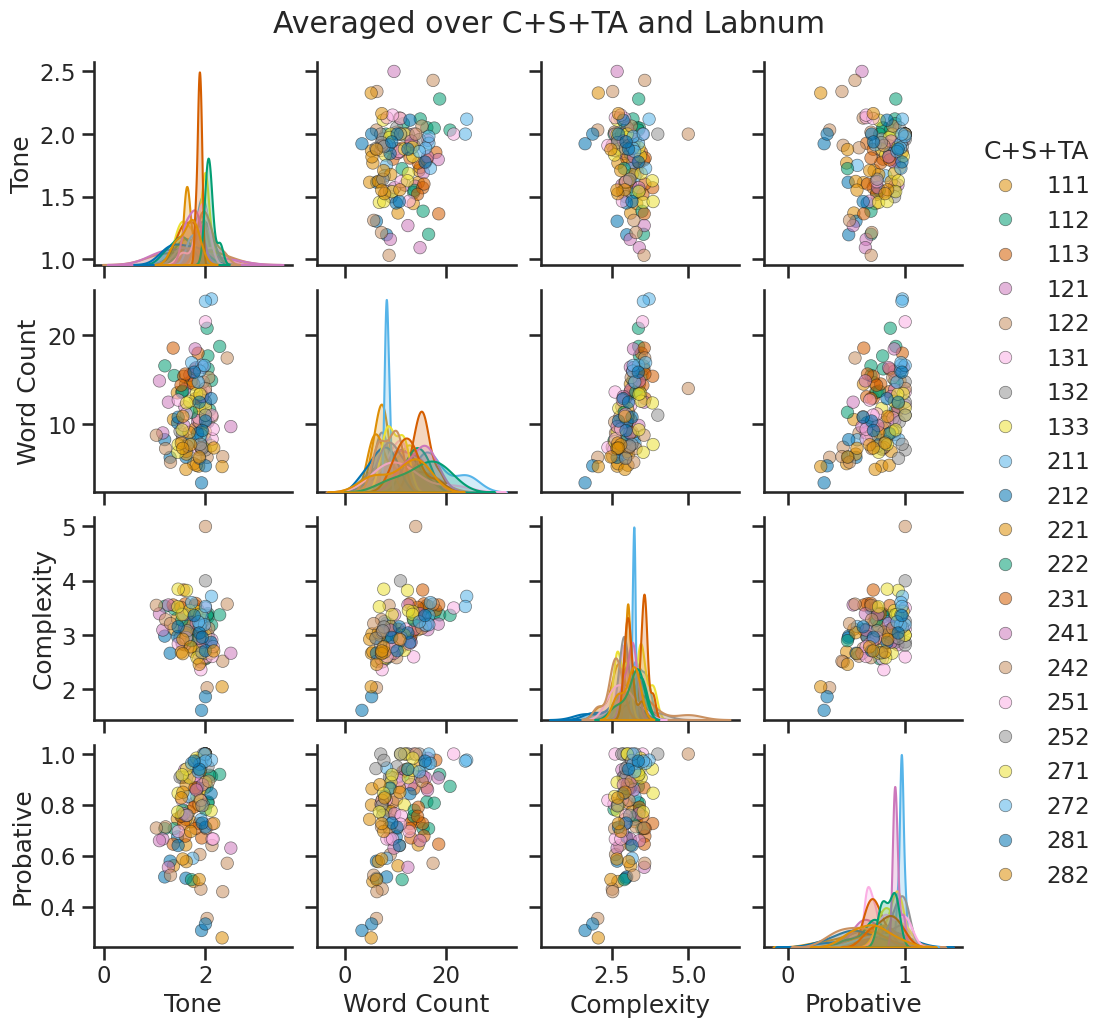

In [5]:
# This is for Figure 11 diagonal to show Lab TA frequencies as asked by Referree
# when grouped by C+S+TA and Labnum.

sns.set_context('talk')

LN_TA_avg_1 = data_group1_df.groupby(['C+S+TA','Labnum']).agg('mean')
LN_TA_avg_1 = LN_TA_avg_1.reset_index()
LN_TA_avg_1 = LN_TA_avg_1[['C+S+TA', 'Tone','Word Count','Complexity','Probative']]

g = sns.pairplot(data=LN_TA_avg_1, hue='C+S+TA', plot_kws=dict(alpha=0.55, edgecolor="k", linewidth=0.5), palette=sns.color_palette('colorblind', 22)[1:])

# Done - change color map maybe but not now choices here: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
# subplots with pairplot in center with individual total histograms on outside as jointplot on outside
# then add colorbar as legend for TAs instead of legend with dots for TAs
# then zoom on interesting matrix graphs and add jointplot next as sns.jointplot("total_bill", "tip", data=tips, kind='reg');
# g=sns.jointplot('Complexity Num', 'Probative Num', data=LN_TA, kind='reg');

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and Labnum', y=1.03)

plt.savefig('TA_Labnum_1.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

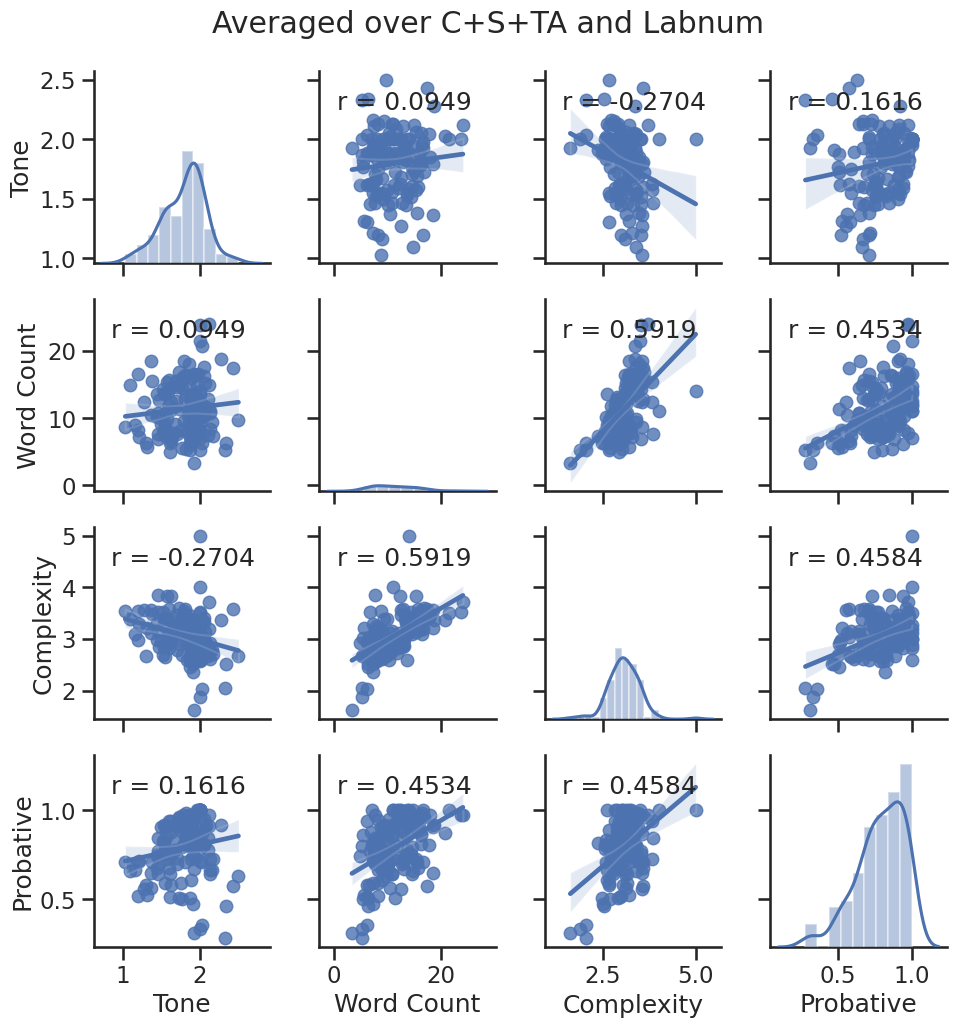

In [6]:
# This is for Figure 11 above diagonal to
# show the averaged data and correlation when grouped by C+S+TA and Labnum.

sns.set_context('talk')

LN_TA_avg_2 = data_group1_df.groupby(['C+S+TA','Labnum']).agg('mean')
LN_TA_avg_2 = LN_TA_avg_2.reset_index()
LN_TA_avg_2 = LN_TA_avg_2[['Tone','Word Count','Complexity','Probative']]

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.4f}".format(r),
                xy=(0.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(LN_TA_avg_2)
g.map_upper(sns.regplot)
g.map_upper(corrfunc)
g.map_diag(sns.distplot, kde=True)
g.map_lower(sns.regplot)
g.map_lower(corrfunc)

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and Labnum', y=1.03)

plt.savefig('TA_Labnum_2.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

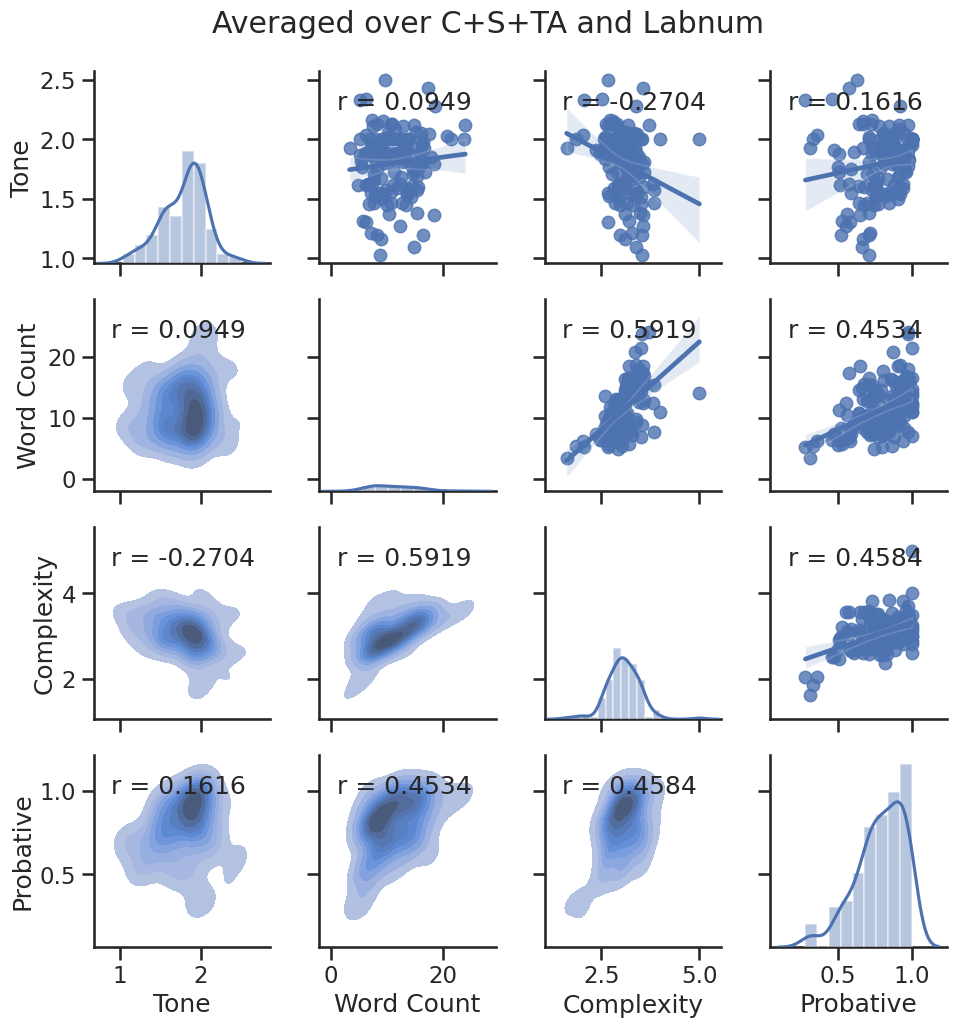

In [7]:
# This is for Figure 11 below diagonal to show data density and above diagonal to
# show the averaged data and correlation when grouped by C+S+TA and Labnum.

sns.set_context('talk')

LN_TA_avg_2 = data_group1_df.groupby(['C+S+TA','Labnum']).agg('mean')
LN_TA_avg_2 = LN_TA_avg_2.reset_index()
LN_TA_avg_2 = LN_TA_avg_2[['Tone','Word Count','Complexity','Probative']]

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.4f}".format(r),
                xy=(0.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(LN_TA_avg_2)
g.map_upper(sns.regplot)
g.map_upper(corrfunc)
g.map_diag(sns.distplot, kde=True)
g.map_lower(sns.kdeplot, shade=True)
g.map_lower(corrfunc)

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and Labnum', y=1.03)

plt.savefig('TA_Labnum_3.png')

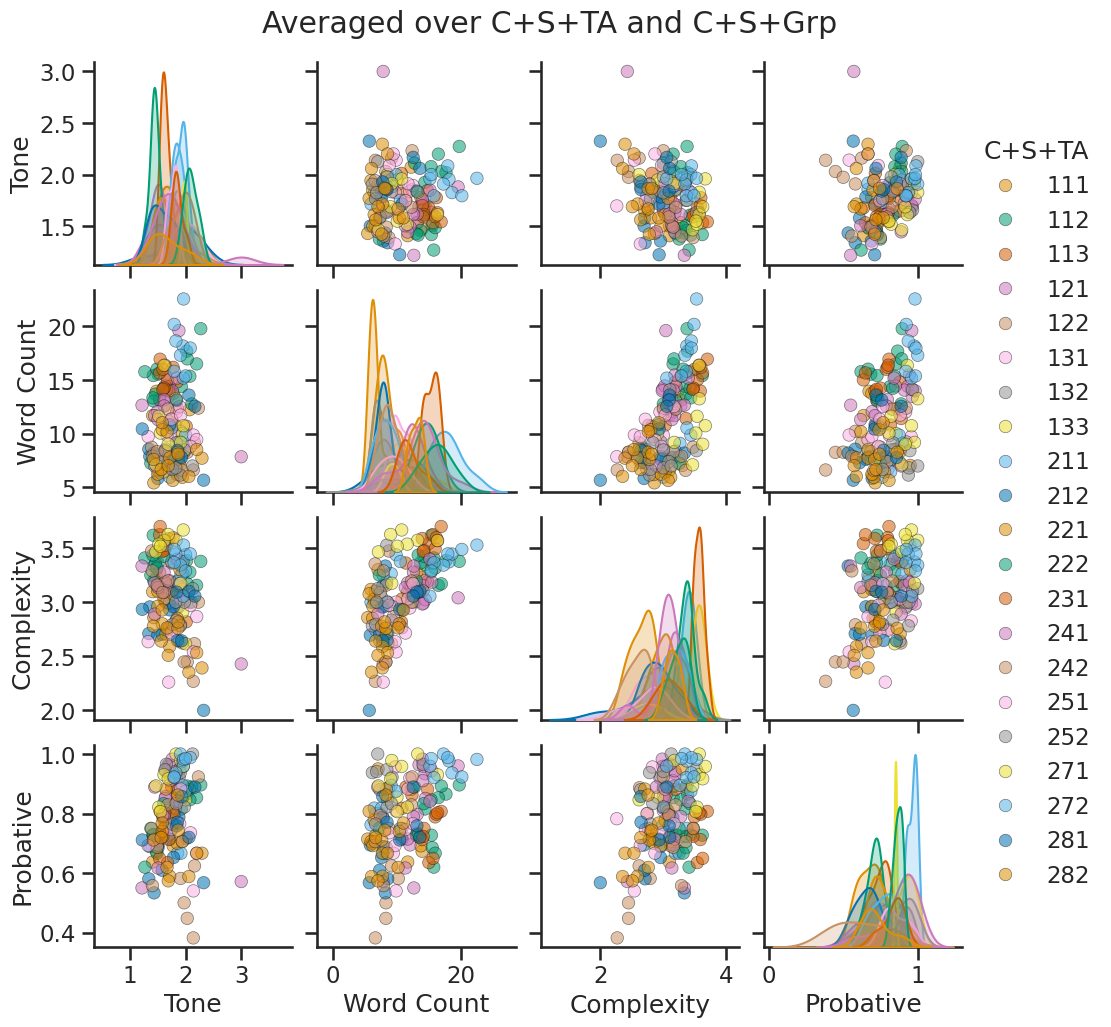

In [8]:
# This is for Figure 12 diagonal to show Lab TA frequencies as asked by Referree
# when grouped by C+S+TA and C+S+Grp.

Grp_TA_avg_1 = data_group1_df.groupby(['C+S+TA','C+S+Grp']).agg('mean')
Grp_TA_avg_1 = Grp_TA_avg_1.reset_index()
Grp_TA_avg_1 = Grp_TA_avg_1[['C+S+TA', 'Tone','Word Count','Complexity','Probative']]

g = sns.pairplot(data=Grp_TA_avg_1, hue='C+S+TA', plot_kws=dict(alpha=0.55, edgecolor="k", linewidth=0.5), palette=sns.color_palette('colorblind', 22)[1:])

g.fig.suptitle('Averaged over C+S+TA and C+S+Grp', y=1.03)

plt.savefig('TA_Student_Group1.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

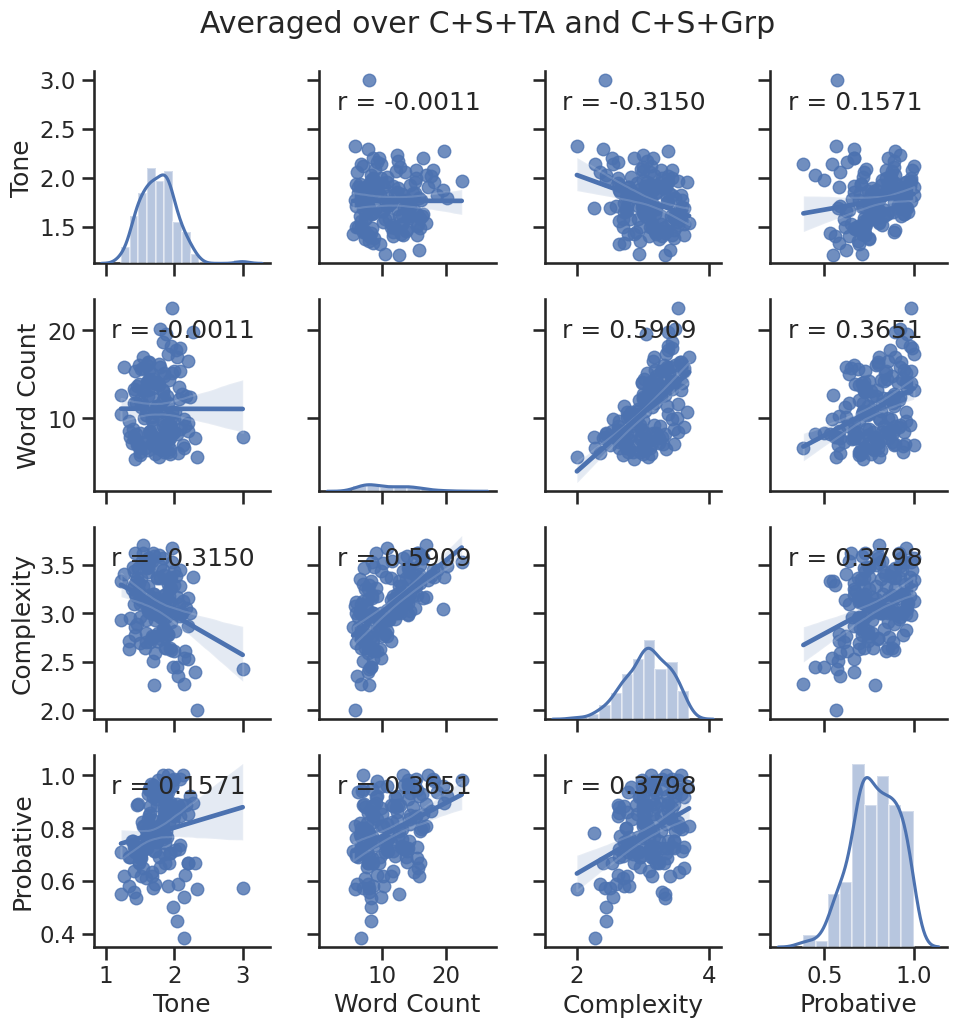

In [9]:
# This is for Figure 12 above diagonal to
# show the averaged data and correlation when grouped by C+S+TA and C+S+Grp.

Grp_TA_avg_2 = data_group1_df.groupby(['C+S+TA','C+S+Grp']).agg('mean')
Grp_TA_avg_2  = Grp_TA_avg_2.reset_index()
Grp_TA_avg_2 = Grp_TA_avg_2[['Tone','Word Count','Complexity','Probative']]

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.4f}".format(r),
                xy=(0.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(Grp_TA_avg_2)
g.map_upper(sns.regplot)
g.map_upper(corrfunc)
g.map_diag(sns.distplot, kde=True)
g.map_lower(sns.regplot)
g.map_lower(corrfunc)

plt.savefig('Grp_TA_Reg.png')

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and C+S+Grp', y=1.03)

# Put N=135 in boxes where histograms are

plt.savefig('TA_Student_Group2.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

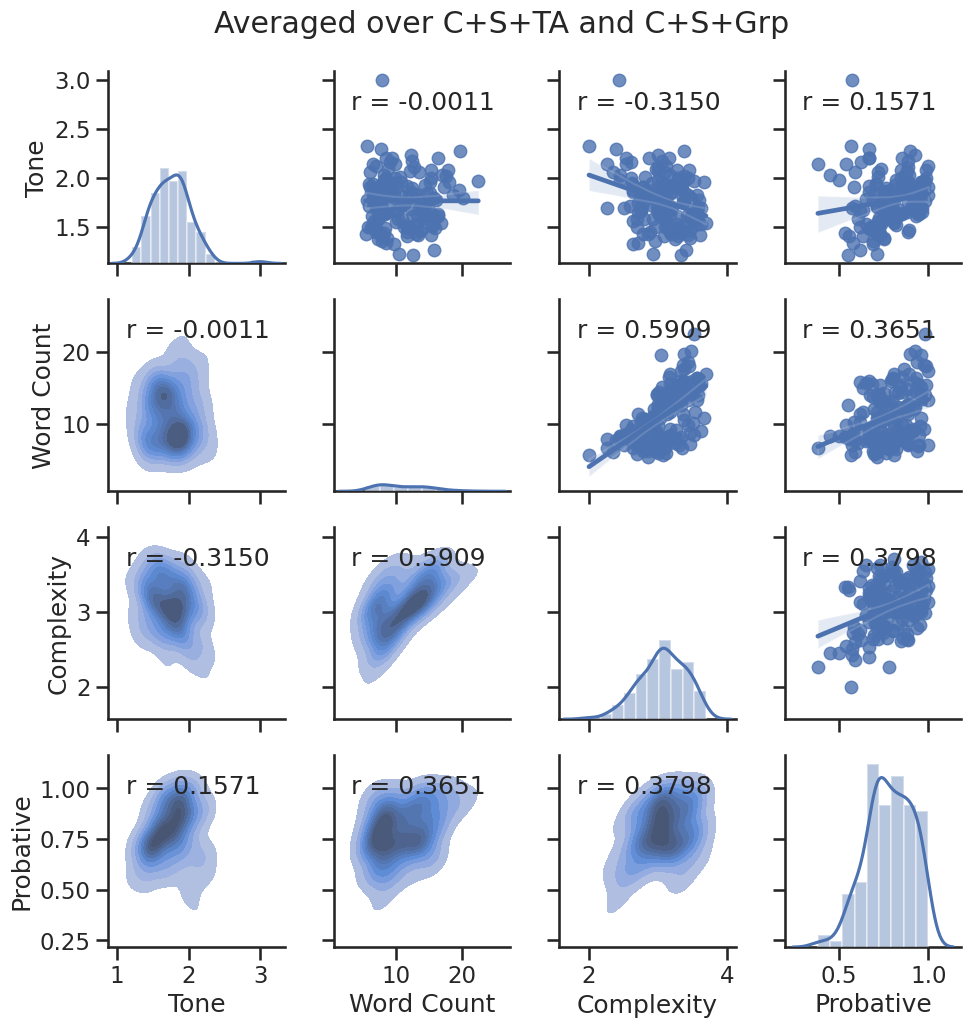

In [10]:
# This is for Figure 12 below diagonal to show data density and above diagonal to
# show the averaged data and correlation when grouped by C+S+TA and Grp.

Grp_TA_avg_2 = data_group1_df.groupby(['C+S+TA','C+S+Grp']).agg('mean')
Grp_TA_avg_2  = Grp_TA_avg_2.reset_index()
Grp_TA_avg_2 = Grp_TA_avg_2[['Tone','Word Count','Complexity','Probative']]

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.4f}".format(r),
                xy=(0.1, .8), xycoords=ax.transAxes)

g = sns.PairGrid(Grp_TA_avg_2)
g.map_upper(sns.regplot)
g.map_diag(sns.distplot, kde=True)
g.map_lower(sns.kdeplot, shade=True)
g.map_upper(corrfunc)
g.map_lower(corrfunc)

#sns.kdeplot(data[col], shade=True)
g.fig.suptitle('Averaged over C+S+TA and C+S+Grp', y=1.03)

plt.savefig('TA_Student_Group3.png')

In [12]:
from PIL import Image

# Open the six images
image1 = Image.open("TA_Labnum_1.png")
image2 = Image.open("TA_Labnum_2.png")
image3 = Image.open("TA_Labnum_3.png")
image4 = Image.open("TA_Student_Group1.png")
image5 = Image.open("TA_Student_Group2.png")
image6 = Image.open("TA_Student_Group3.png")

# Create a new image with the desired size
width = image1.width + image4.width
height = image1.height + image2.height + image3.height

new_image = Image.new("RGB", (width, height))

# Paste the images onto the new image
new_image.paste(image1, (0, 0))
new_image.paste(image2, (0, image1.height))
new_image.paste(image3, (0, image1.height + image2.height))
new_image.paste(image4, (image1.width, 0))
new_image.paste(image5, (image1.width, image1.height))
new_image.paste(image6, (image1.width, image1.height + image2.height))

# Save the new image
new_image.save("Figures11and12.jpg")